In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
data = pd.read_csv("Crop_recommendation.csv")

In [4]:
data = pd.read_csv("Crop_recommendation.csv")

In [5]:
data.shape

(2200, 8)

In [6]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [9]:
print("Average Ratio of Nitrogen in soil:", data["N"].mean())
print("Average Ratio of Phosphorus in soil:", data["P"].mean())
print("Average Ratio of Potassium in soil:", data["K"].mean())
print("Average Humidity (%):", data["humidity"].mean())
print("Average Rainfall in mm:", data["N"].mean())
print("Average PH of soil:", data["ph"].mean())
print("Average Temperature(C):", data["temperature"].mean())

Average Ratio of Nitrogen in soil: 50.551818181818184
Average Ratio of Phosphorus in soil: 53.36272727272727
Average Ratio of Potassium in soil: 48.14909090909091
Average Humidity (%): 71.48177921778637
Average Rainfall in mm: 50.551818181818184
Average PH of soil: 6.469480065256364
Average Temperature(C): 25.616243851779544


In [10]:
@interact
def summary(crops= list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("-----------------------------------------------------------")
    print("Minimum Nitrogen Required:", x['N'].min())
    print("Average Nitrogen Required:", x['N'].mean())
    print("Maximum Nitrogen Required:", x['N'].max())
    print("-----------------------------------------------------------")
    print("Minimum Phosphorus Required:", x['P'].min())
    print("Average Phosphorus Required:", x['P'].mean())
    print("Maximum Phosphorus Required:", x['P'].max())
    print("-----------------------------------------------------------")
    print("Minimum Potassium Required:", x['K'].min())
    print("Average Potassium Required:", x['K'].mean())
    print("Maximum Potassium Required:", x['K'].max())
    print("-----------------------------------------------------------")
    print("Minimum Temperature Required:", x['temperature'].min())
    print("Average Temperature Required:", x['temperature'].mean())
    print("Maximum Temperature Required:", x['temperature'].max())
    print("-----------------------------------------------------------")
    print("Minimum Humidity Required:", x['humidity'].min())
    print("Average Humidity Required:", x['humidity'].mean())
    print("Maximum Humidity Required:", x['humidity'].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [11]:
@interact
def compare(conditions = ['N','P','K','temperature','humidity','ph','rainfall']):
    print("Crops which require greater than average", conditions)
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print("------------------------------------------------------------")
    print("Crops which require less than average",conditions)
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

C:\Users\DELL\AppData\Local\Temp\ipykernel_8868\1750847338.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['N'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_8868\1750847338.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['P'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_8868\1750

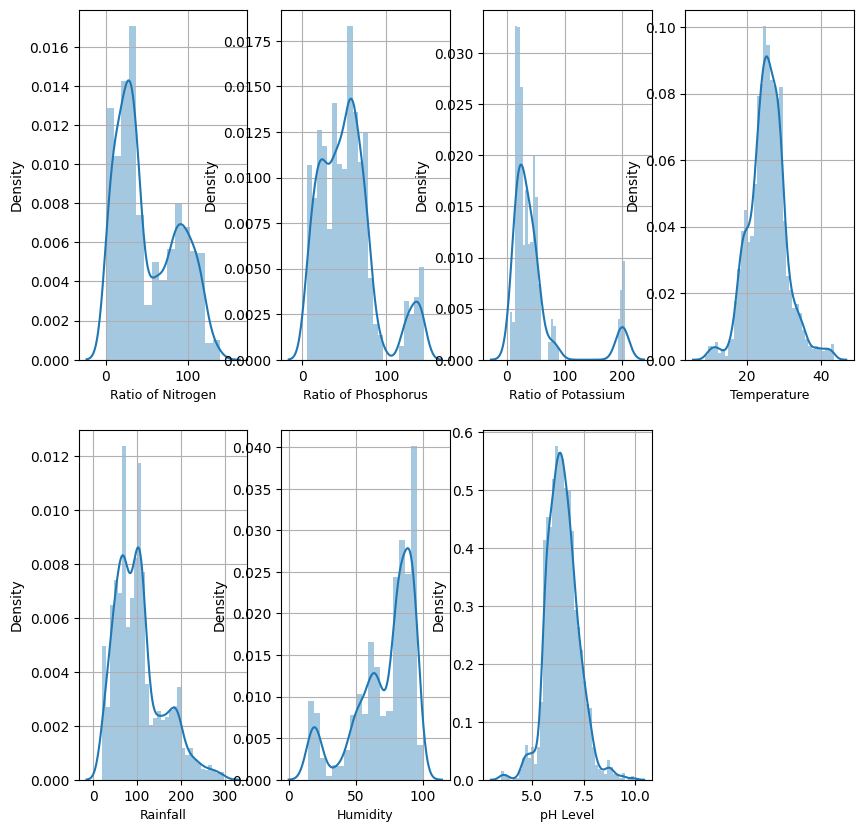

In [65]:
plt.subplot(2, 4, 1)
sns.distplot(data['N'])
plt.xlabel('Ratio of Nitrogen', fontsize=9)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['P'])
plt.xlabel('Ratio of Phosphorus', fontsize=9)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['K'])
plt.xlabel('Ratio of Potassium', fontsize=9)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['temperature'])
plt.xlabel('Temperature', fontsize=9)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['rainfall'])
plt.xlabel('Rainfall', fontsize=9)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['humidity'])
plt.xlabel('Humidity', fontsize=9)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['ph'])
plt.xlabel('pH Level', fontsize=9)
plt.grid()

In [18]:
print("Crops which require high level of Nitrogen:",data[data['N']>120]['label'].unique())
print("Crops which require high level of Phosphorus:",data[data['P']>100]['label'].unique())
print("Crops which require high level of Potassium:",data[data['K']>200]['label'].unique())
print("Crops which require high Temperature:",data[data['temperature']>40]['label'].unique())
print("Crops which require low Temperature:",data[data['temperature']<10]['label'].unique())
print("Crops which require high pH:",data[data['ph']>9]['label'].unique())
print("Crops which require low pH",data[data['ph']<4]['label'].unique())
print("Crops which require high Humidity:",data[data['humidity']>80]['label'].unique())
print("Crops which require low humidity:",data[data['humidity']<20]['label'].unique())
print("Crops which require high Rainfall",data[data['rainfall']>200]['label'].unique())
print("Crops which require low Rainfall:",data[data['rainfall']<50]['label'].unique())

Crops which require high level of Nitrogen: ['cotton']
Crops which require high level of Phosphorus: ['grapes' 'apple']
Crops which require high level of Potassium: ['grapes' 'apple']
Crops which require high Temperature: ['grapes' 'papaya']
Crops which require low Temperature: ['grapes']
Crops which require high pH: ['mothbeans']
Crops which require low pH ['mothbeans']
Crops which require high Humidity: ['rice' 'mungbean' 'pomegranate' 'banana' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute']
Crops which require low humidity: ['chickpea' 'kidneybeans']
Crops which require high Rainfall ['rice' 'papaya' 'coconut']
Crops which require low Rainfall: ['mothbeans' 'mungbean' 'lentil' 'watermelon' 'muskmelon' 'papaya']


In [20]:
print("Summer Crops:")
print(data[data['temperature']>30]['label'].unique())
print("-------------------------------------------------------------------------------")
print("Winter Crops:")
print(data[data['temperature']<20]['label'].unique())
print("-------------------------------------------------------------------------------")
print("Rainy Crops:")
print(data[data['rainfall']>200]['label'].unique())

Summer Crops:
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-------------------------------------------------------------------------------
Winter Crops:
['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'lentil' 'pomegranate'
 'grapes' 'orange']
-------------------------------------------------------------------------------
Rainy Crops:
['rice' 'papaya' 'coconut']


In [26]:
X = data.drop(['label'], axis='columns')
y = data['label']
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
X_train.head(5)

,N,P,K,temperature,humidity,ph,rainfall
1075,95,82,48,27.394896,83.311720,5.719015,92.781336
731,25,65,21,33.863512,68.592323,6.880246,69.244641
2110,84,36,28,26.735062,55.551648,6.119892,140.630521
855,10,79,20,24.982875,66.895409,6.379881,38.213706
317,27,80,15,19.070962,21.210923,5.788387,86.219176


In [45]:
y_train.head(5)

1075         banana
731       blackgram
2110         coffee
855          lentil
317     kidneybeans
Name: label, dtype: object

In [51]:
model.score(X_test,y_test)

0.9636363636363636

In [54]:
y_pred = model.predict(X_test)

In [48]:
import pickle

In [50]:
with open ("Crop_Recommendation_Model", "wb") as f:
    pickle.dump(model,f)

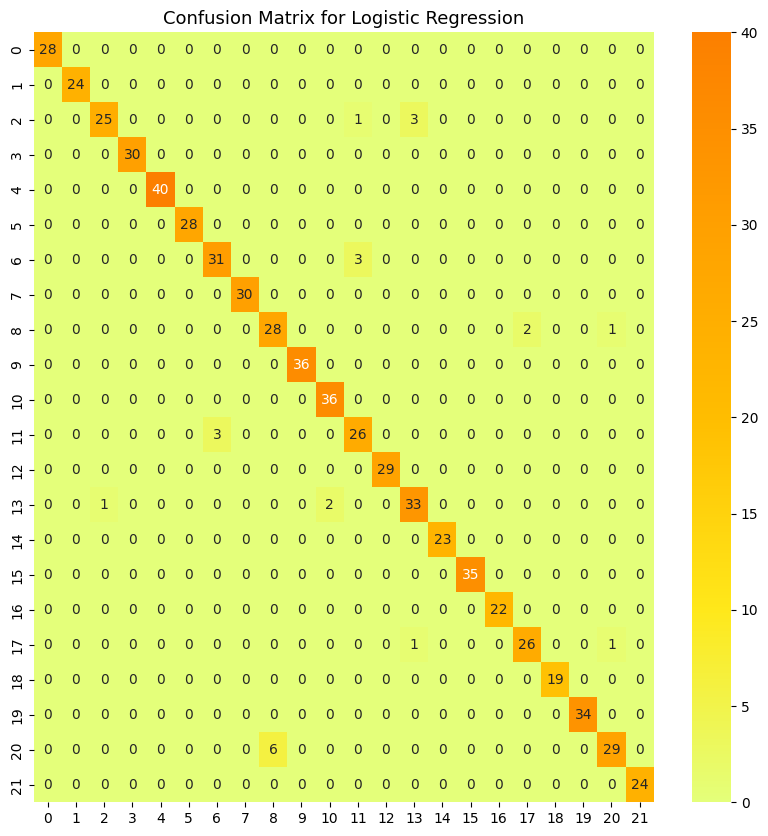

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 13)
plt.show()

In [63]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        24
   blackgram       0.96      0.86      0.91        29
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        40
      coffee       1.00      1.00      1.00        28
      cotton       0.91      0.91      0.91        34
      grapes       1.00      1.00      1.00        30
        jute       0.82      0.90      0.86        31
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.95      1.00      0.97        36
       maize       0.87      0.90      0.88        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.89      0.92      0.90        36
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        35
      orange       1.00      1.00      1.00        22
      papaya       0.93    